In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest 
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

In [2]:
df = pd.read_csv('experiment_lesson_4.csv')

In [3]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


district
Central     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Purlieus    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Suburb      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

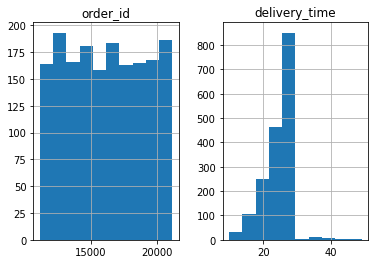

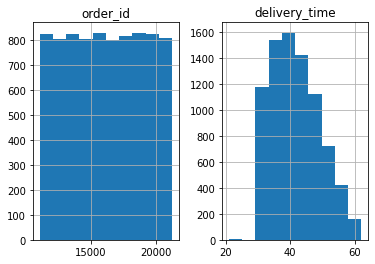

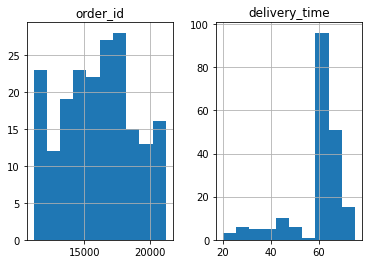

In [5]:
df.query('experiment_group == "test"').groupby('district').hist()

district
Central     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Purlieus    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Suburb      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

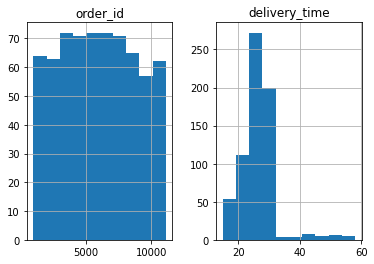

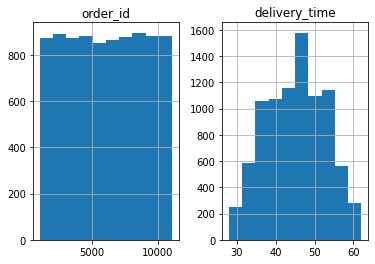

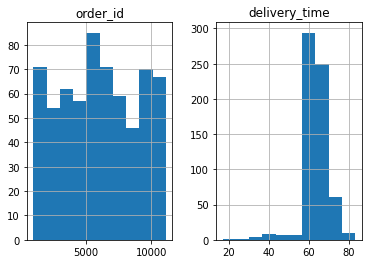

In [6]:
df.query('experiment_group == "control"').groupby('district').hist()

In [7]:
df.query('experiment_group == "test"').agg({'order_id':'count'})

order_id    10104
dtype: int64

In [8]:
df.query('experiment_group == "control"').agg({'order_id':'count'})

order_id    10092
dtype: int64

In [9]:
10104 - 10092


12

In [10]:
10092 - 10104 

-12

In [27]:
dft = df.query('experiment_group == "test"').delivery_time

In [28]:
dfc = df.query('experiment_group == "control"').delivery_time

In [29]:
normaltest(dft)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [30]:
normaltest(dfc)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


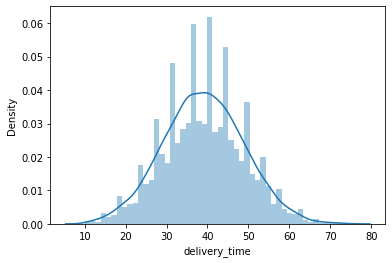

In [20]:
sns.distplot(dft)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


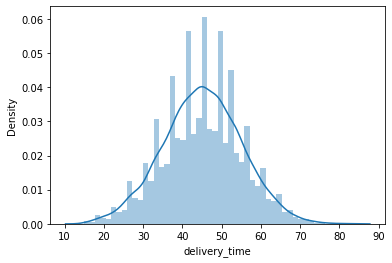

In [22]:
sns.distplot(dfc)

In [31]:
dft.std()

9.883308351129061

In [32]:
dfc.std()

9.990016960246372

In [37]:
ttest_ind(dft,dfc)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [40]:
((dft.mean() - dfc.mean() ) / dfc.mean()) *100

-13.354653121660812

In [ ]:
"""""
Вывод: раскатываем новый алгоритм на всех, 
так как среднее время доставки статистически значимо изменилось. 
Среднее время доставки в тесте меньше, чем в контроле.
""""